In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Projet Generali Challenge

Lecture du fichier

In [95]:
data = pd.read_csv('X.csv', delimiter=',')
target_data = pd.read_csv('y.csv', delimiter=',')

data.head()

,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,0,18702,2014,1,0,V,N,1,O,1,...,IDENTIQUE,V,base,2,1351.0,4,2012.0,0.0,2,65440
1,1,3877,2014,1,0,V,V,V,V,V,...,V,N,base,2,1972.0,2,1980.0,0.0,.,14341
2,2,4942,2013,1,1,V,V,V,V,V,...,V,N,base,2,1630.0,4,NaN,0.0,.,75109
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,V,N,base,2,532.0,3,NaN,0.0,.,92004
4,4,17137,2015,1,0,V,N,2,O,1,...,IDENTIQUE,V,base,2,1050.0,2,1972.0,0.0,4,59340


Après vérification de l'unicité des identifiants des deux fichiers, nous avons merge le fichier X.csv avec le fichier y.csv, avec rajout de la colonne target sur l'identifiant (commun aux deux fichiers).

In [96]:
print("data, Nombre d'identifiants uniques:", data['Identifiant'].nunique())
print("target_data, Nombre d'identifiants uniques:", target_data['Identifiant'].nunique())

data = data.merge(target_data[['Identifiant', 'target']], on='Identifiant')
data.head()

data, Nombre d'identifiants uniques: 10229
target_data, Nombre d'identifiants uniques: 10229


,Unnamed: 0,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,0,18702,2014,1,0,V,N,1,O,1,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,1,3877,2014,1,0,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,2,4942,2013,1,1,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,3,13428,2013,"0,246575342",0,N,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,4,17137,2015,1,0,V,N,2,O,1,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


Nous allons pouvoir retirer la colonne "unnamed" qui est le numéro de ligne, une colonne non pertinante.

In [97]:
df = data.copy()
df = df.drop(['Unnamed: 0'], axis=1)

df.head()

,Identifiant,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,target
0,18702,2014,1,0,V,N,1,O,1,O,...,V,base,2,1351.0,4,2012.0,0.0,2,65440,0
1,3877,2014,1,0,V,V,V,V,V,V,...,N,base,2,1972.0,2,1980.0,0.0,.,14341,1
2,4942,2013,1,1,V,V,V,V,V,V,...,N,base,2,1630.0,4,NaN,0.0,.,75109,0
3,13428,2013,"0,246575342",0,N,V,V,V,V,V,...,N,base,2,532.0,3,NaN,0.0,.,92004,0
4,17137,2015,1,0,V,N,2,O,1,O,...,V,base,2,1050.0,2,1972.0,0.0,4,59340,0


### Dimensions du dataset

In [98]:
df.shape

(10229, 26)

Nous avons 10229 lignes, une colonne binaire à prédire et 25 variables explicatives.

## Types et valeurs manquantes par variable

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifiant  10229 non-null  int64  
 1   ft_2_categ   10229 non-null  int64  
 2   EXPO         10229 non-null  object 
 3   ft_4_categ   10229 non-null  int64  
 4   ft_5_categ   10229 non-null  object 
 5   ft_6_categ   10229 non-null  object 
 6   ft_7_categ   10229 non-null  object 
 7   ft_8_categ   10229 non-null  object 
 8   ft_9_categ   10229 non-null  object 
 9   ft_10_categ  10229 non-null  object 
 10  ft_11_categ  10229 non-null  object 
 11  ft_12_categ  10229 non-null  object 
 12  ft_13_categ  10229 non-null  object 
 13  ft_14_categ  10229 non-null  object 
 14  ft_15_categ  10229 non-null  object 
 15  ft_16_categ  10229 non-null  object 
 16  ft_17_categ  10229 non-null  object 
 17  ft_18_categ  10229 non-null  object 
 18  ft_19_categ  10229 non-null  int64  
 19  supe

- La variable Identifiant ne nous étant plus utile (elle l'était pour rattacher la variable target), nous allons la retirer de notre analyse car elle fausserait le fonctionnement du modèle, l'identifiant n'a aucune pertinence dans notre analyse prédictive.
- La variable Ft_2_categ est une variable qualitative, il s'agît de l'année d'observation pour le contrat d'assurance. Nous allons la passer en object.
- La variable EXPO est une variable quantitative, nous allons donc la passer en float plutôt qu'object. Pour cela, nous allons devoir remplacer les "," par des "." dans ses valeurs.
- La variable ft_4_categ est une variable quantitative discrète, à laisser en int, à défaut d'être en mesure de prouver qu'il s'agît d'une variable qualitative.
- Les variables de ft_5_categ à ft_18_categ sont qualitatives et en object.
- La variable ft_19_categ est une variable quantitative discrète, à laisser en int, à défaut d'être en mesure de prouver qu'il s'agît d'une variable qualitative.
- La variable ft_21_categ est une variable quantitative discrète, à laisser en int, à défaut d'être en mesure de prouver qu'il s'agît d'une variable qualitative.
- La variable ft_22_categ est une variable qualitative, elle contient des attributs (années), nous allons en faire une variable qualitative car nous pensons qu'il est pertinent dans le cadre de notre analyse, d'être en mesure d'identifier le comportement de la variable target en fonction des années (catastrophes naturelles, accidents...) à passer en object. 
- La variable ft_23_categ, est également catégorielle (car elle contient une valeur V qui semble être une catégorie, au même titre que les autres valeurs numériques), elle est donc à laisser en object.

La variable ft_24_categ contient deux variables non-numériques, qui sont un point et >=10, des valeurs que nous avons interprété comme étant un 0 et 10. 10 contenant donc les valeurs de 10 et +.
Nous allons donc passer la variable en int et effectuer le remplacement des données non-numériques.

Pour les variables contenant des valeurs non-numériques, nous sommes partis sur la base du fait qu'une variable qualitative  décrit des caractéristiques ou des attributs qui ne peuvent pas être quantifiés par des nombres de manière significative, ce qui est le cas des valeurs non-numériques. Nous avons donc fait le choix de laisser ces variables en variables catégorielles (qualitatives).

- La variable target est la variable cible, étant un booléen, nous allons la passer en object plutôt qu'en int.


In [100]:
df = df.drop('Identifiant', axis=1)

df['ft_2_categ'] = df['ft_2_categ'].astype(object)

df['EXPO'] = df['EXPO'].str.replace(',', '.')
df['EXPO'] = df['EXPO'].astype(float)

df['ft_22_categ'] = df['ft_22_categ'].astype(object)

df['ft_24_categ'] = df['ft_24_categ'].replace('   .', 0)
df['ft_24_categ'] = df['ft_24_categ'].replace('>=10', 10)
df['ft_24_categ'] = df['ft_24_categ'].astype(int)

df['target'] = df['target'].astype(object)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10229 entries, 0 to 10228
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ft_2_categ   10229 non-null  object 
 1   EXPO         10229 non-null  float64
 2   ft_4_categ   10229 non-null  int64  
 3   ft_5_categ   10229 non-null  object 
 4   ft_6_categ   10229 non-null  object 
 5   ft_7_categ   10229 non-null  object 
 6   ft_8_categ   10229 non-null  object 
 7   ft_9_categ   10229 non-null  object 
 8   ft_10_categ  10229 non-null  object 
 9   ft_11_categ  10229 non-null  object 
 10  ft_12_categ  10229 non-null  object 
 11  ft_13_categ  10229 non-null  object 
 12  ft_14_categ  10229 non-null  object 
 13  ft_15_categ  10229 non-null  object 
 14  ft_16_categ  10229 non-null  object 
 15  ft_17_categ  10229 non-null  object 
 16  ft_18_categ  10229 non-null  object 
 17  ft_19_categ  10229 non-null  int64  
 18  superficief  10110 non-null  float64
 19  ft_2

In [101]:
df.isnull().sum()

ft_2_categ        0
EXPO              0
ft_4_categ        0
ft_5_categ        0
ft_6_categ        0
ft_7_categ        0
ft_8_categ        0
ft_9_categ        0
ft_10_categ       0
ft_11_categ       0
ft_12_categ       0
ft_13_categ       0
ft_14_categ       0
ft_15_categ       0
ft_16_categ       0
ft_17_categ       0
ft_18_categ       0
ft_19_categ       0
superficief     119
ft_21_categ       0
ft_22_categ    1236
ft_23_categ       0
ft_24_categ       0
Insee           115
target            0
dtype: int64

Observations : Nous avons 119 valeurs nulles dans la colonne superficief, 1236 dans la colonne ft_22_categ ainsi que 115 dans Insee.

Le nombre de lignes étant négligeables (115), nous allons retirer les lignes dont les colonnes Insee sont nulles.

Pour la colonne superficief, nous allons faire une imputation simple, en remplaçant les valeurs nulles par la moyenne de la variable.

Pour ft_22_categ, nous allons remplacer les valeurs manquantes par les valeurs les plus fréquentes dans le jeu de données.

Nous aurions pu également remplacer les valeurs manquantes par une imputation avancée (entraîner le modèle pour prédire les données manquantes).

In [102]:
df = df.dropna(subset=['Insee'])

most_frequent_value = df['ft_22_categ'].mode()[0]
df['ft_22_categ'] = df['ft_22_categ'].fillna(most_frequent_value)
df['ft_22_categ'] = df['ft_22_categ'].astype(object)

df['superficief'] = df['superficief'].fillna(df['superficief'].mean())

df.isnull().sum()

ft_2_categ     0
EXPO           0
ft_4_categ     0
ft_5_categ     0
ft_6_categ     0
ft_7_categ     0
ft_8_categ     0
ft_9_categ     0
ft_10_categ    0
ft_11_categ    0
ft_12_categ    0
ft_13_categ    0
ft_14_categ    0
ft_15_categ    0
ft_16_categ    0
ft_17_categ    0
ft_18_categ    0
ft_19_categ    0
superficief    0
ft_21_categ    0
ft_22_categ    0
ft_23_categ    0
ft_24_categ    0
Insee          0
target         0
dtype: int64

## Distribution variable cible

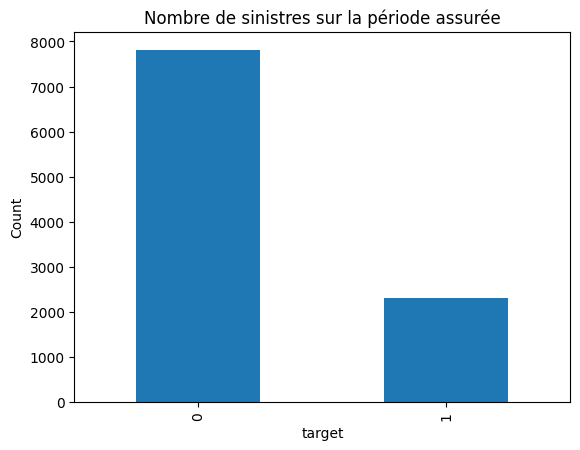

In [103]:
df['target'].value_counts().plot(kind='bar')
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Nombre de sinistres sur la période assurée')
plt.show()

## Analyse univariée des variables quantitatives

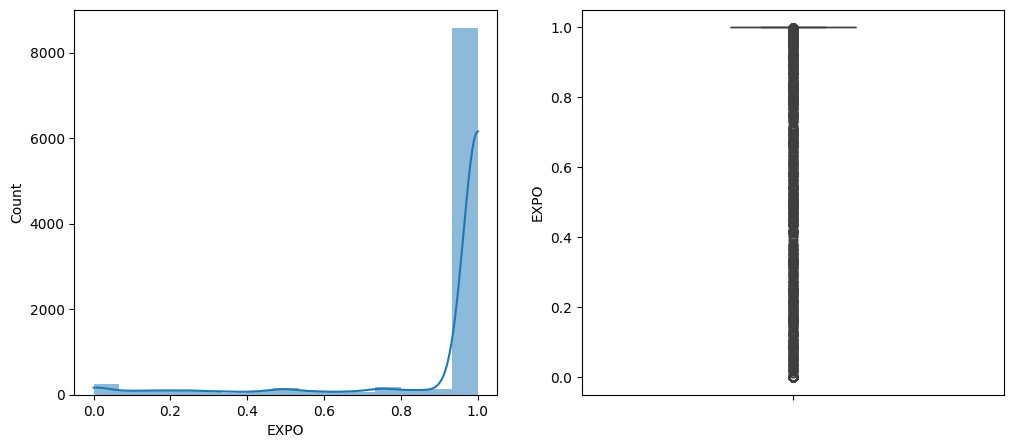

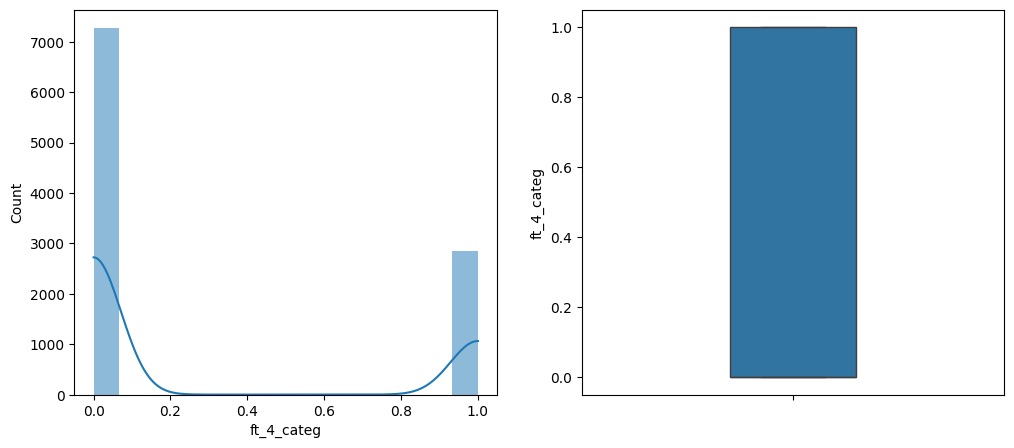

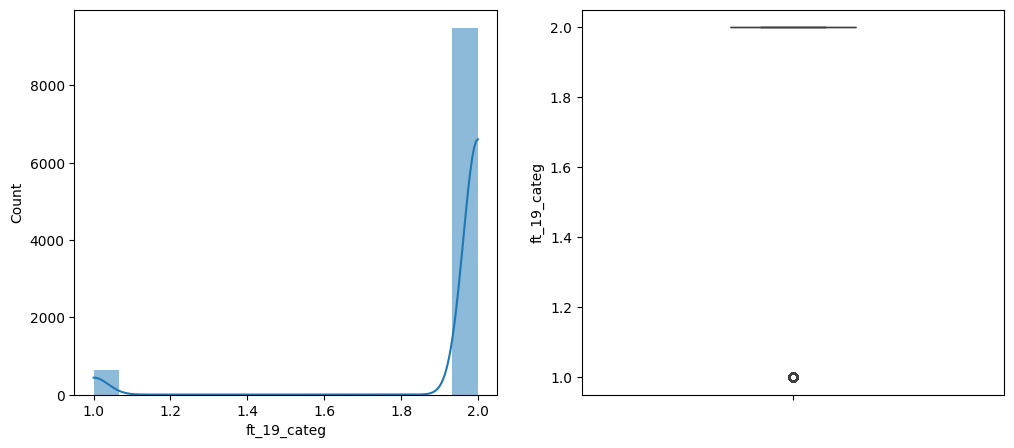

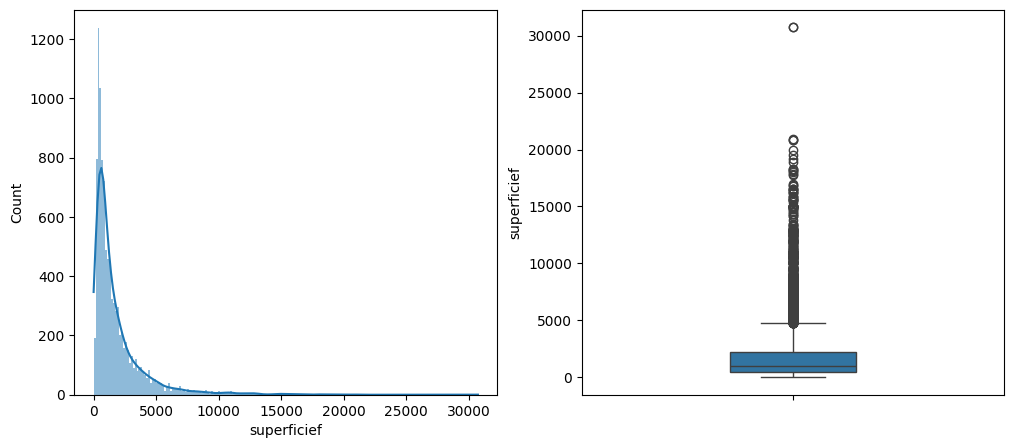

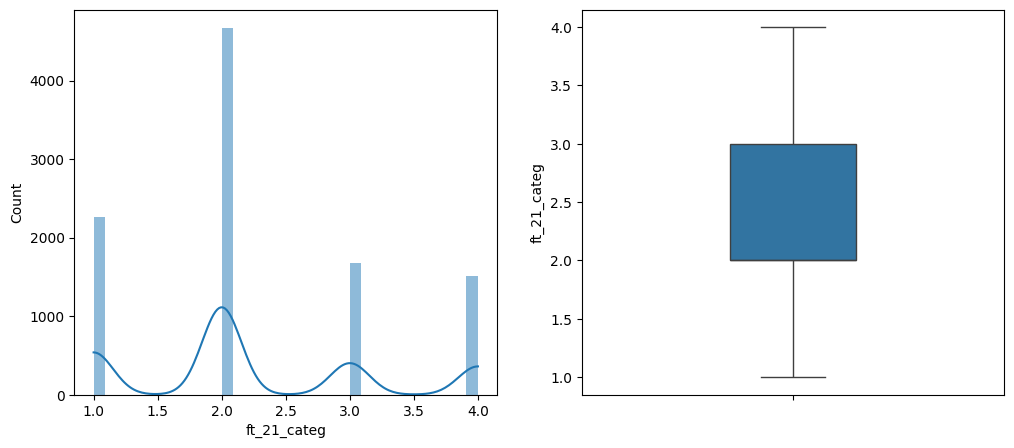

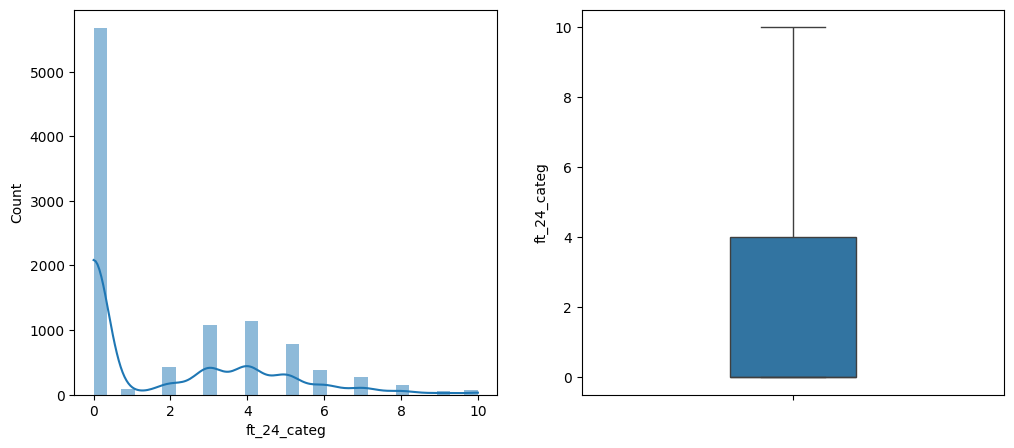

In [104]:
import seaborn as sns

for col in df.select_dtypes(['float64', 'int64']):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width=0.3)

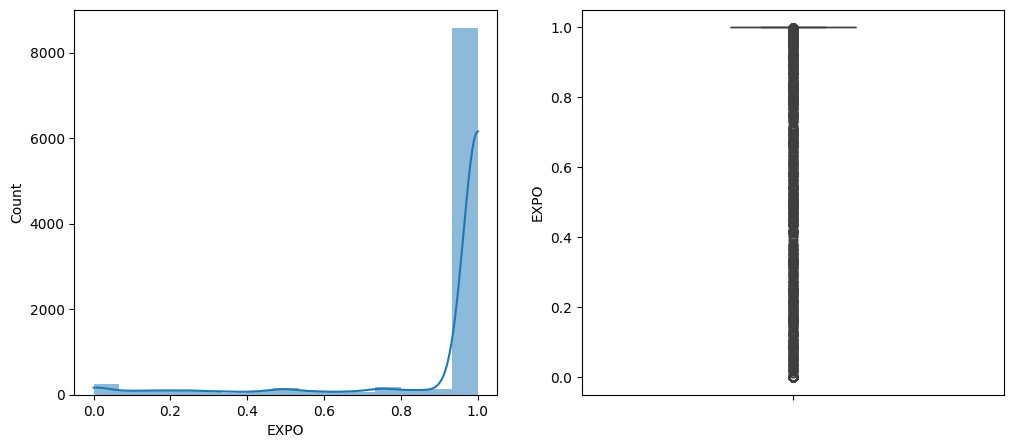

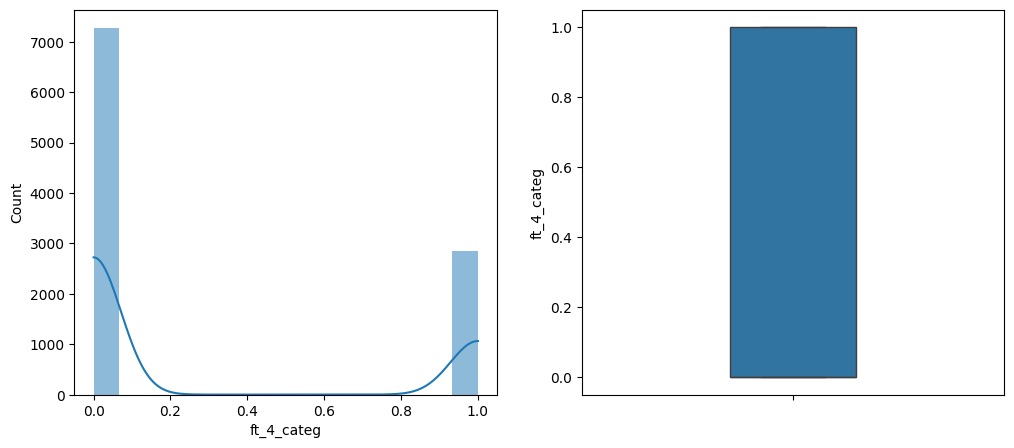

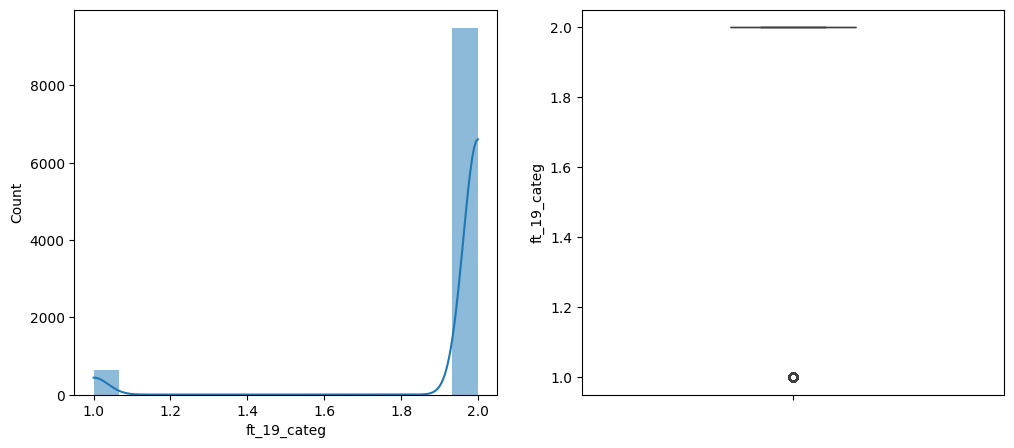

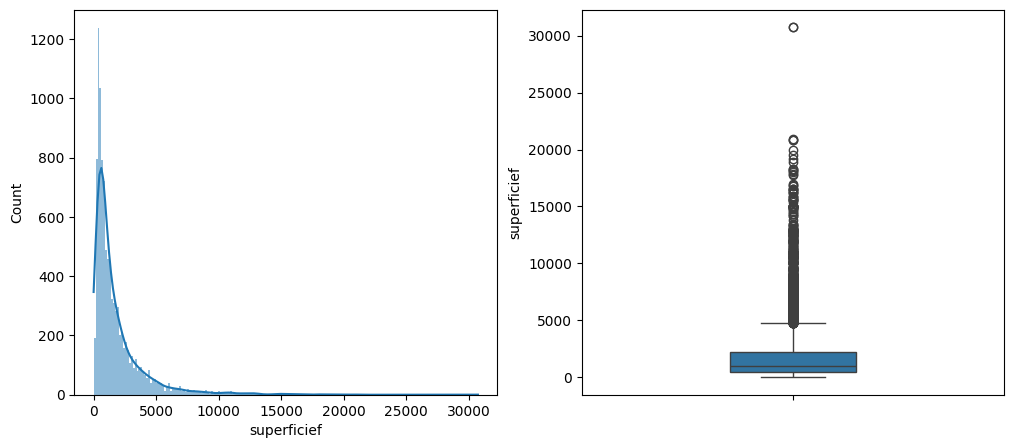

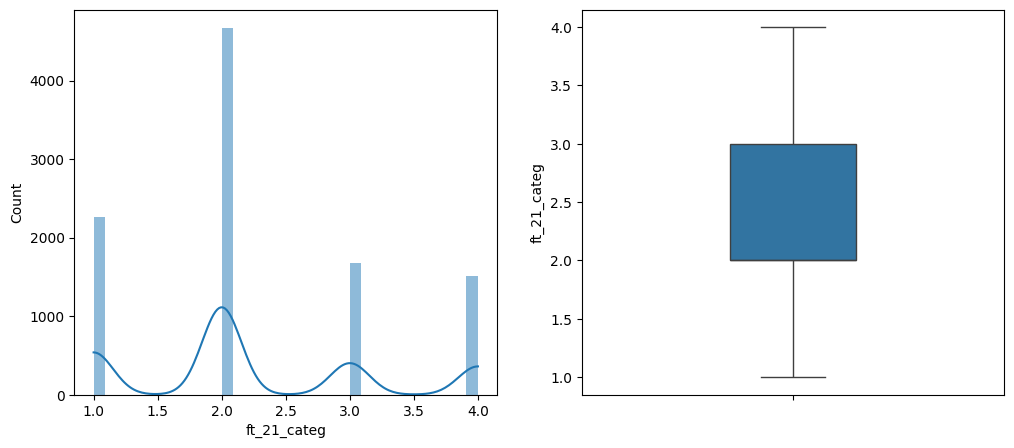

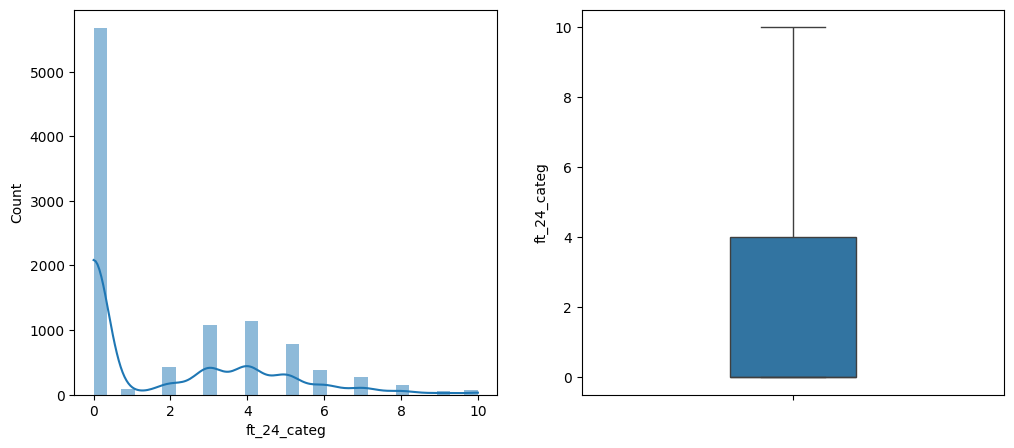

In [105]:
import seaborn as sns

for col in df.select_dtypes(['float64', 'int64']):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width=0.3)

## Mise à l'échelle de la variable superficief

<Axes: ylabel='superficief'>

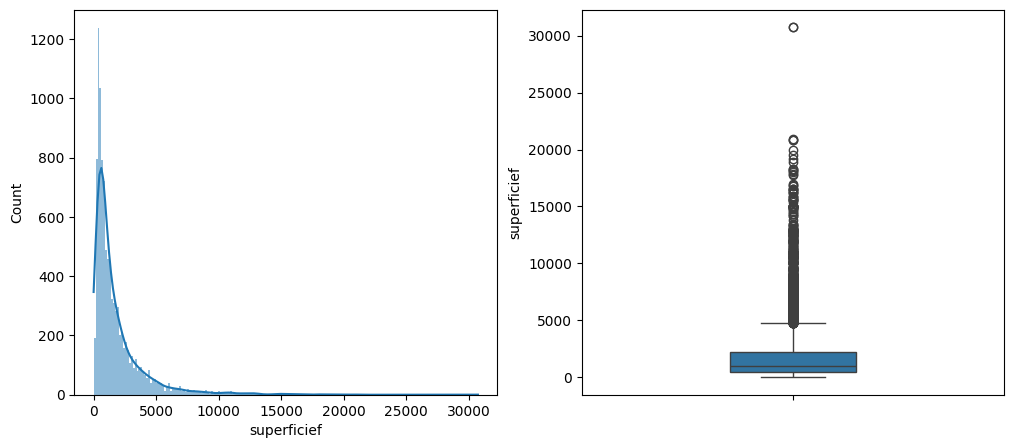

In [106]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['superficief'], kde=True, edgecolor=None)

plt.subplot(1,2,2)
sns.boxplot(df['superficief'], width=0.3)

Comme on peut le voir, l'échelle de la variable superficief est bien trop large, la majorité des valeurs se trouvent entre 0 et 5000, mais nous avons un grand groupe de variables jusqu'aux alentours de 20000 et une à 30000. Nous souhaitons ramener les valeurs sur une échelle plus cohérente pour éviter de perturber le modèle.

On choisit d'utiliser la standardisation pour la mise à l'échelle car la normalisation ramenerait les valeurs entre 0 et 1, ce qui serait peu pertinent et ajouterait de nombreuses décimales. 

<Axes: ylabel='superficief'>

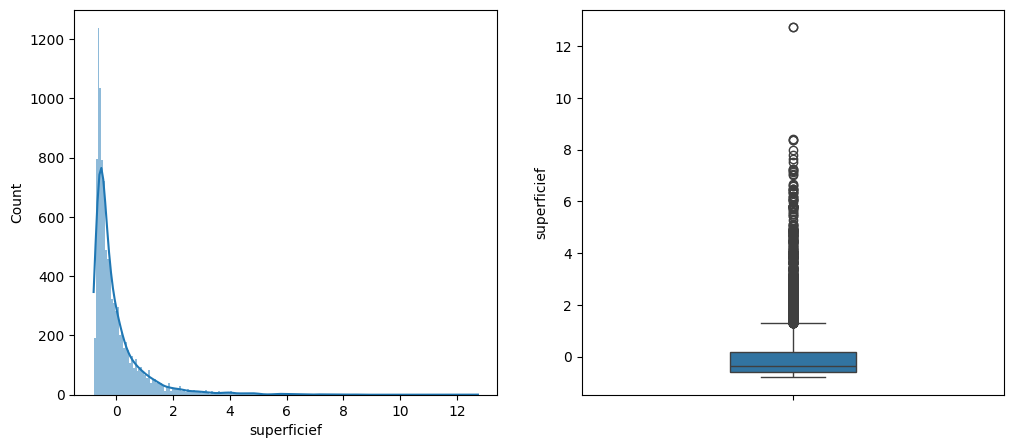

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['superficief'] = scaler.fit_transform(df[['superficief']])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['superficief'], kde=True, edgecolor=None)

plt.subplot(1,2,2)
sns.boxplot(df['superficief'], width=0.3)

## Visualisation univariée des variables qualitatives

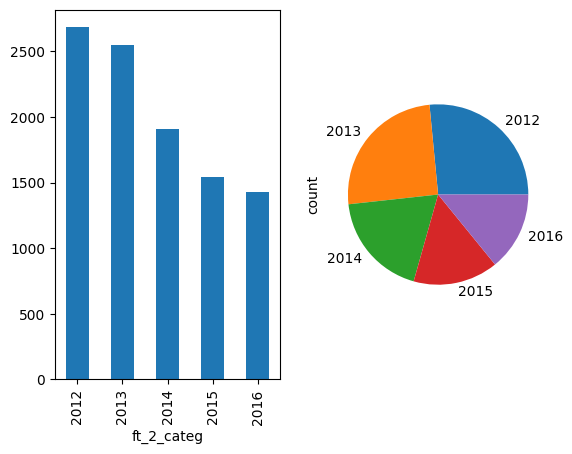

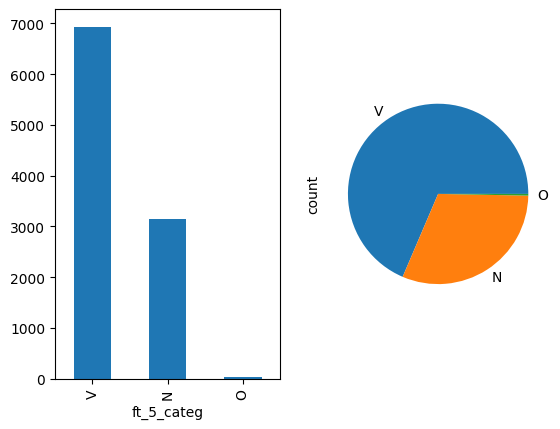

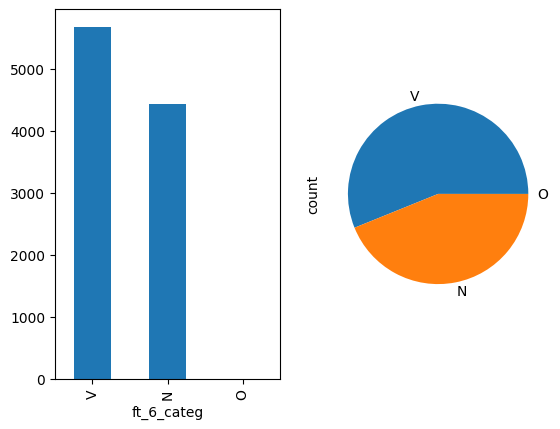

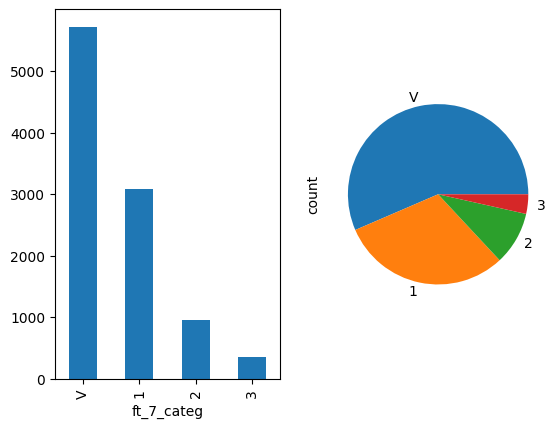

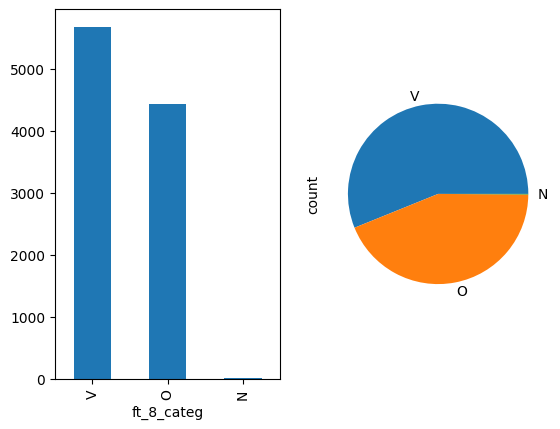

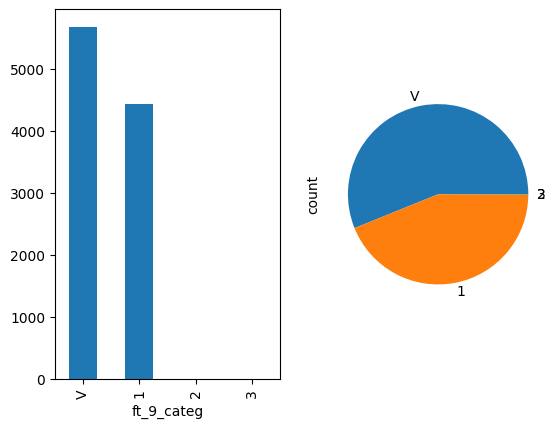

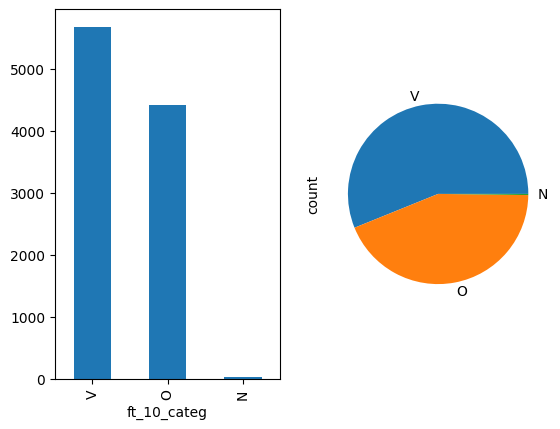

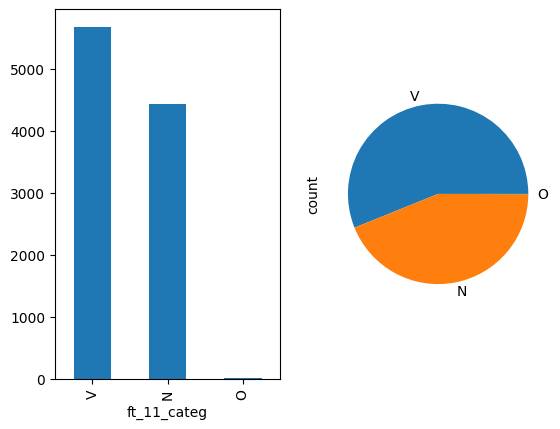

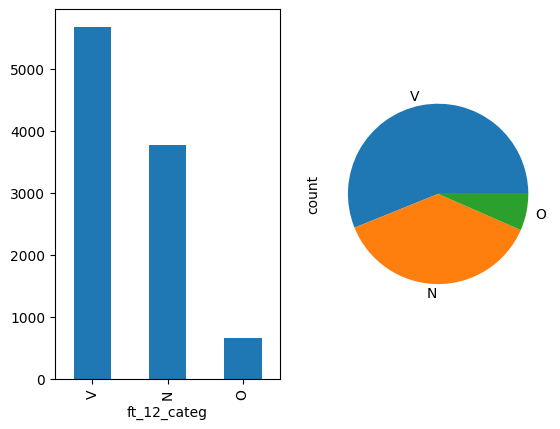

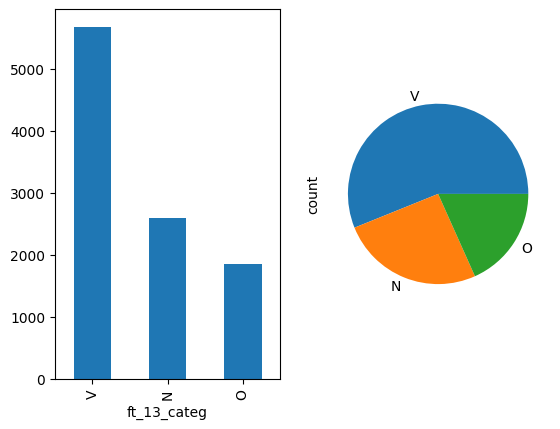

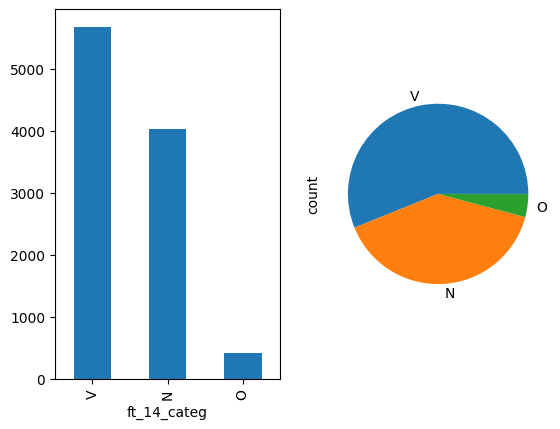

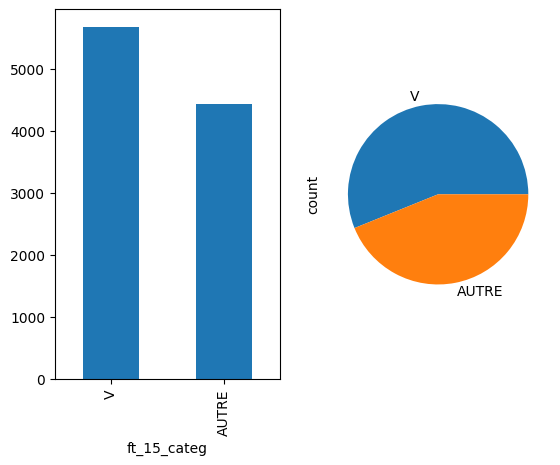

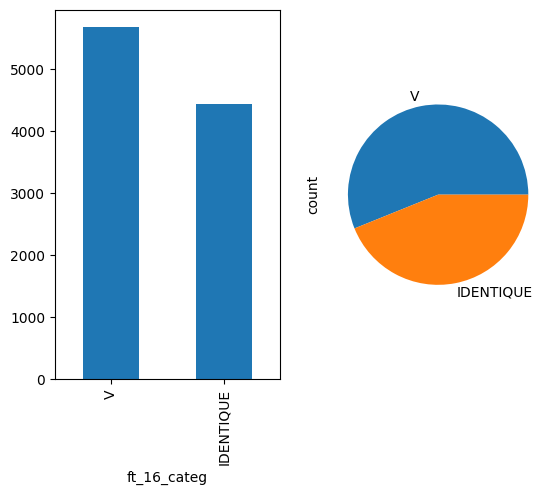

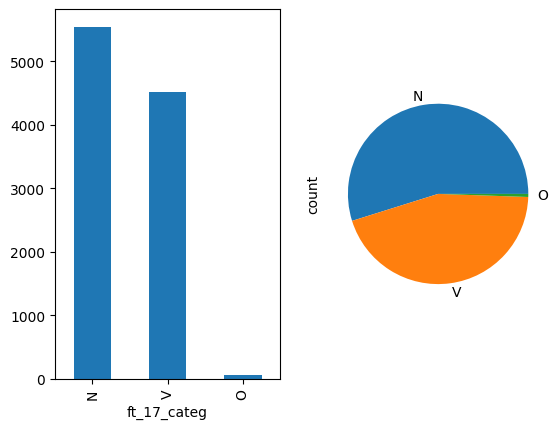

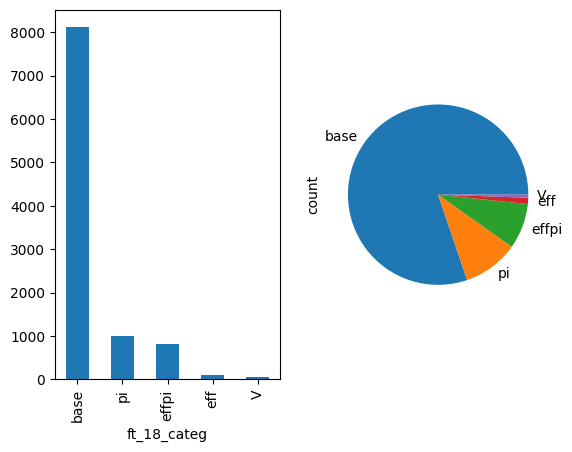

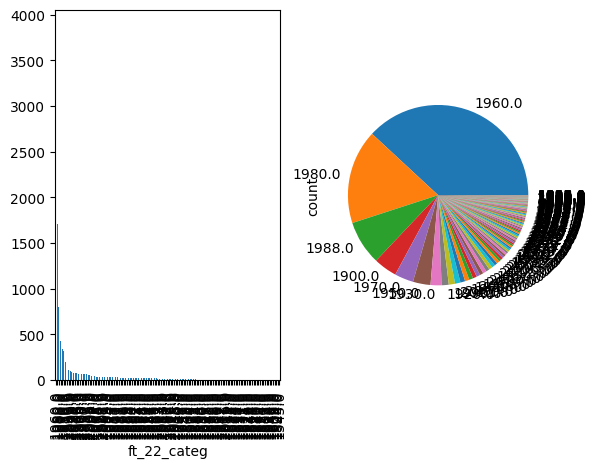

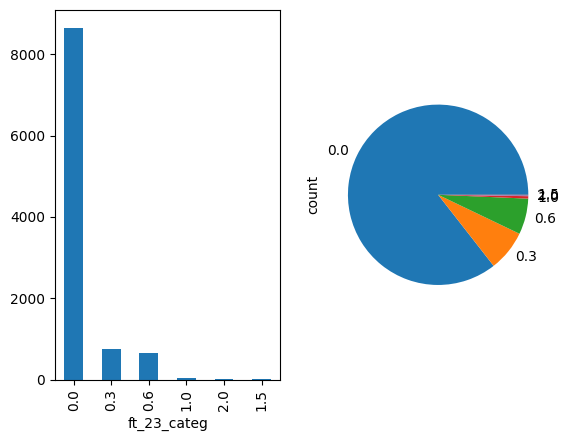

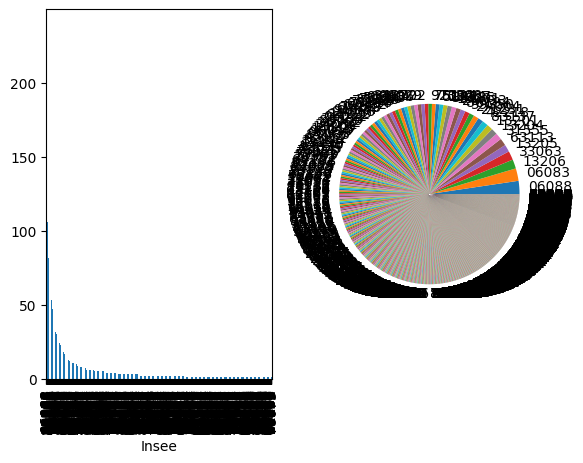

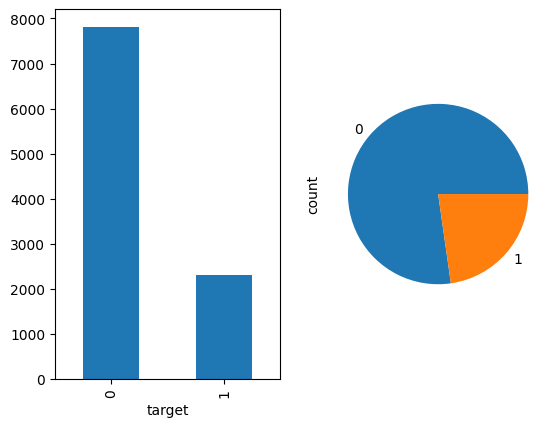

In [108]:
for col in df.select_dtypes('object') :
    plt.figure()
    
    plt.subplot(1,2,1)
    df[col].value_counts().plot(kind='bar')
    
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie()

Observations : 
- 'O' de ft_5_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- 'O' de ft_6_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- '2' et '3' de ft_7_categ : Peu de valeurs mais ne semble pas insignifiant.
- 'N' de ft_8_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- '2' et '3' de ft_9_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- 'N' de ft_10_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- 'O' de ft_11_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- 'O' de ft_12_categ : Peu de valeurs mais ne semble pas insignifiant.
- 'O' de ft_14_categ : Peu de valeurs mais ne semble pas insignifiant.
- 'O' de ft_17_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- 'pi', 'effpi' de ft_18_categ : Peu de valeurs mais ne semble pas insignifiant.
- 'eff', 'V' de ft_18 : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.

Il y a trop de valeurs dans la variable ft_22_categ, pour un problème de cohérence, nous allons retirer les valeurs pour retirer les années qui précèdent 1900, période au milieu de la seconde révolution industrielle, qui a fait émerger les préoccupations d'assurances modernes.

Nous nous sommes rendus compte que la colonne ft_23_categ, que nous avions gardé en tant que variable catégorielle car elle comportait une valeur 'V' ne contient plus cette valeur. Cela s'explique car les lignes la comportant ont été supprimées, elles ne comportaient pas de valeur dans la colonne INSEE non plus. Ce qui a été retiré dans notre pré-traitement des données.

- '1', '2', '1.5' de ft_23_categ : Peu de valeurs et semble insignifiant par rapport aux autres valeurs.
- 'O.3' et '0.6' de ft_23_categ : Peu de valeurs mais ne semble pas insignifiant.

La variable INSEE ne comporte pas de valeurs intéressantes pour la prédiction. Nous allons essayer de réduire le nombre de valeurs possibles en coupant le code INSEE et en gardant uniquement le code du département.




In [109]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

ft_2_categ---------- [2014 2013 2015 2016 2012]
ft_5_categ---------- ['V' 'N' 'O']
ft_6_categ---------- ['N' 'V' 'O']
ft_7_categ---------- ['1' 'V' '2' '3']
ft_8_categ---------- ['O' 'V' 'N']
ft_9_categ---------- ['1' 'V' '2' '3']
ft_10_categ--------- ['O' 'V' 'N']
ft_11_categ--------- ['N' 'V' 'O']
ft_12_categ--------- ['N' 'V' 'O']
ft_13_categ--------- ['N' 'V' 'O']
ft_14_categ--------- ['N' 'V' 'O']
ft_15_categ--------- ['AUTRE' 'V']
ft_16_categ--------- ['IDENTIQUE' 'V']
ft_17_categ--------- ['V' 'N' 'O']
ft_18_categ--------- ['base' 'effpi' 'pi' 'eff' 'V']
ft_22_categ--------- [2012.0 1980.0 1960.0 1972.0 1961.0 1930.0 1988.0 1950.0 1970.0 1949.0
 2011.0 1974.0 1986.0 1992.0 1990.0 2005.0 1925.0 1919.0 1940.0 1991.0
 1900.0 1989.0 2010.0 1920.0 2003.0 2008.0 1958.0 1998.0 1870.0 1890.0
 1955.0 1994.0 1965.0 1850.0 2002.0 1999.0 1935.0 2000.0 1895.0 1967.0
 1995.0 1975.0 1997.0 1945.0 1953.0 1976.0 1910.0 1979.0 1987.0 1959.0
 2006.0 2009.0 1977.0 1800.0 1978.0 2007.0 1875.0 1969.0

In [110]:
df['Insee'] = df['Insee'].str[:-3]

df = df[df['ft_22_categ'] >= 1900]


In [111]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

ft_2_categ---------- [2014 2013 2015 2016 2012]
ft_5_categ---------- ['V' 'N' 'O']
ft_6_categ---------- ['N' 'V' 'O']
ft_7_categ---------- ['1' 'V' '2' '3']
ft_8_categ---------- ['O' 'V' 'N']
ft_9_categ---------- ['1' 'V' '2' '3']
ft_10_categ--------- ['O' 'V' 'N']
ft_11_categ--------- ['N' 'V' 'O']
ft_12_categ--------- ['N' 'V' 'O']
ft_13_categ--------- ['N' 'V' 'O']
ft_14_categ--------- ['N' 'V' 'O']
ft_15_categ--------- ['AUTRE' 'V']
ft_16_categ--------- ['IDENTIQUE' 'V']
ft_17_categ--------- ['V' 'N' 'O']
ft_18_categ--------- ['base' 'effpi' 'pi' 'eff' 'V']
ft_22_categ--------- [2012.0 1980.0 1960.0 1972.0 1961.0 1930.0 1988.0 1950.0 1970.0 1949.0
 2011.0 1974.0 1986.0 1992.0 1990.0 2005.0 1925.0 1919.0 1940.0 1991.0
 1900.0 1989.0 2010.0 1920.0 2003.0 2008.0 1958.0 1998.0 1955.0 1994.0
 1965.0 2002.0 1999.0 1935.0 2000.0 1967.0 1995.0 1975.0 1997.0 1945.0
 1953.0 1976.0 1910.0 1979.0 1987.0 1959.0 2006.0 2009.0 1977.0 1978.0
 2007.0 1969.0 1957.0 1973.0 1996.0 1984.0 2004.0 1956.0

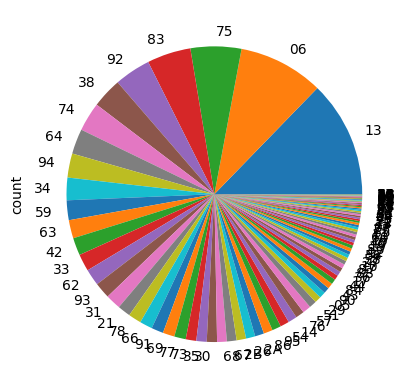

In [112]:
plt.figure()

df['Insee'].value_counts().plot(kind='pie')

plt.show()

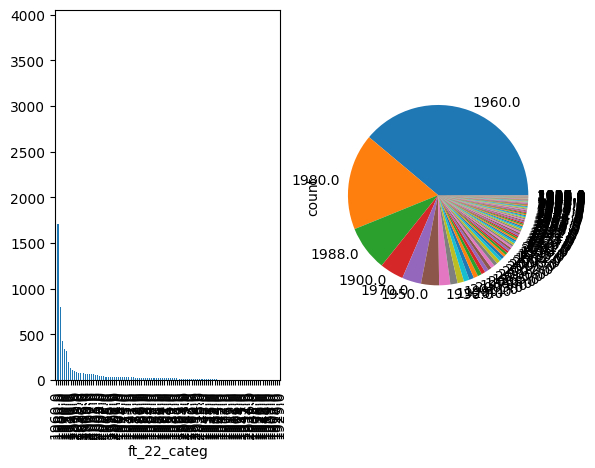

In [118]:
plt.figure()


plt.subplot(1,2,1)
df['ft_22_categ'].value_counts().plot(kind='bar')
    
plt.subplot(1,2,2)
df['ft_22_categ'].value_counts().plot(kind='pie')

plt.show()

Nous allons garder la variable Insee car elle contient désormais moins de valeurs, le modèle pourra l'exploiter plus facilement, en effectuant des prédictions basées sur les départements des assurés.

# Analyse bivariée

In [113]:
target_true = df[df['target'] == 1]
target_false = df[df['target'] == 0]

In [114]:
target_true['target'].value_counts()

target
1    2252
Name: count, dtype: int64

In [115]:
target_false['target'].value_counts()

target
0    7657
Name: count, dtype: int64

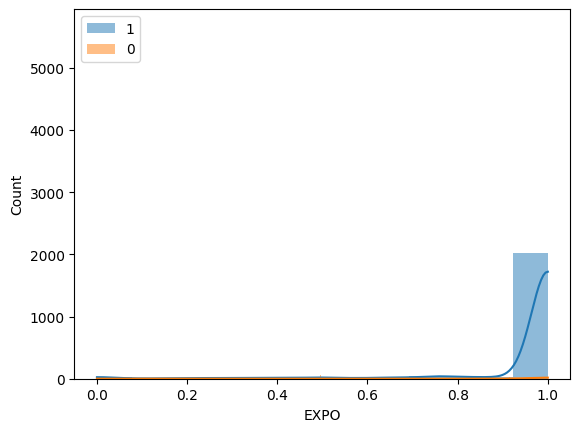

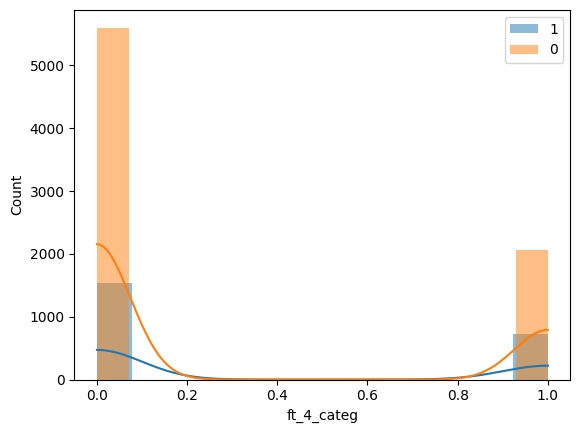

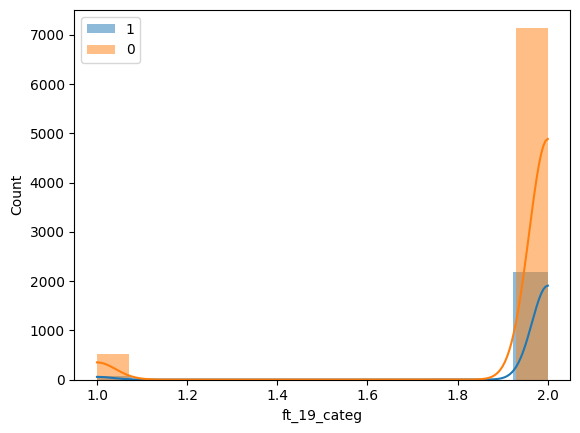

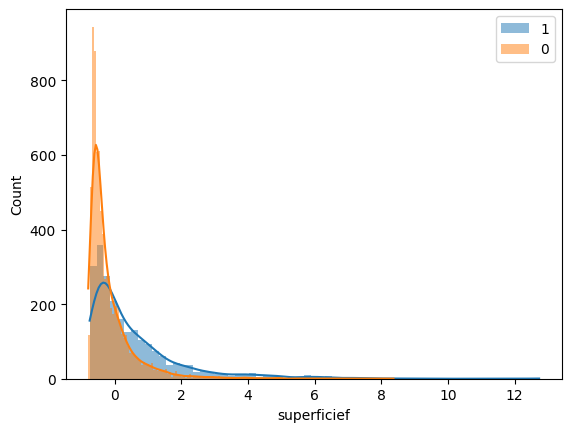

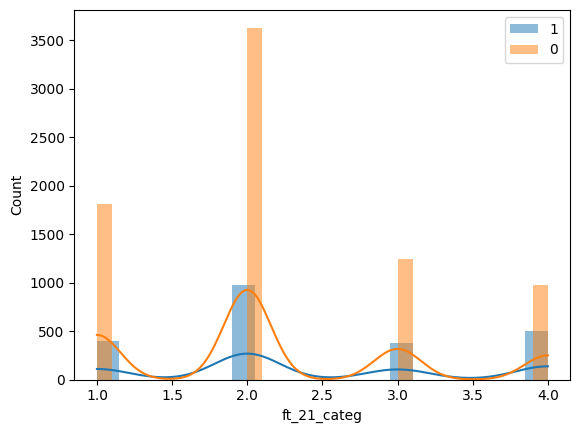

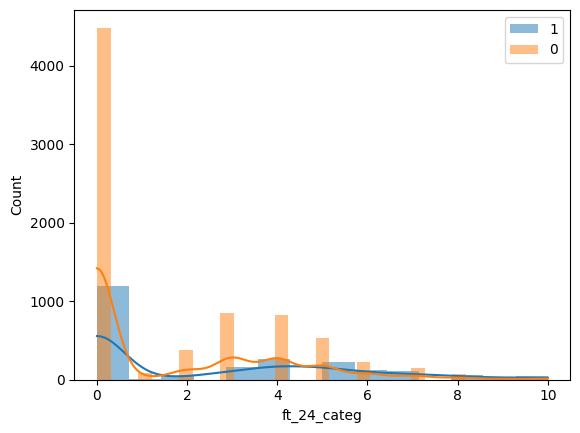

In [116]:
for col in target_true.select_dtypes(['float64', 'int64']):

    sns.histplot(target_true[col], label = '1', kde=True, edgecolor=None)
    sns.histplot(target_false[col], label = '0', kde=True, edgecolor=None)

    plt.legend()
    plt.show()

Observations : 
- On remarque qu'il y a plus de risques d'avoir d'accident pour des contrats d'un an (Full year insurance).
- La distribution de target à 1 est plus élevée lorsque la superficie augmente.
- La distribution de target est plus élevée lorsque ft_21_categ est à 2, que ce soit pour la valeur target à 0 
- La distribution de target est plus élevée lorsque ft_24_categ est à 0.

# Analyse bivariée des variables qualitatives